In [1]:
import pandas as pd

df = pd.read_csv('rest_data.csv')

df.head()

,category,text
0,arts,you are using an older browser version. please...
1,arts,on 31 march two of classical music s most acco...
2,arts,bpt after a year of being locked away at home ...
3,arts,pilot uninjured plane hit sandbar while landin...
4,arts,colleen distin photo by facebook toronto sun ....


Axes(0.125,0.11;0.775x0.77)


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/karennurlybekov/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/karennurlybekov/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/karennurlybekov/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


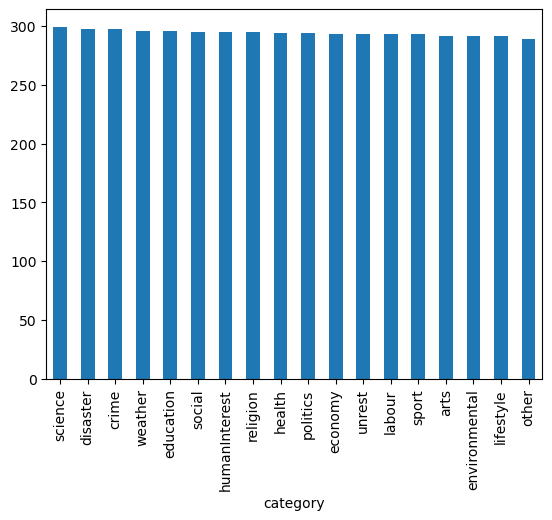

In [3]:
from nltk import word_tokenize, WordNetLemmatizer
import pandas as pd
import matplotlib.pyplot as plt
print(df["category"].value_counts().plot.bar())

# Text Preprocessing
import re
from nltk.corpus import stopwords, words
from langdetect import detect

# Download NLTK resources (run once)
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    """
    Cleans and preprocesses the input text.
    """
    # Step 1: Remove URLs
    text = re.sub(r'http\S+', '', text)
    
    # Step 2: Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    # Step 3: Remove special characters, numbers, and punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Step 4: Convert to lowercase
    text = text.lower()
    
    # Step 5: Tokenize text into words
    tokens = word_tokenize(text)
    
    # Step 6: Remove stopwords and non-English words
    tokens = [word for word in tokens if word not in stop_words]
    
    # Step 7: Lemmatize words
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Step 8: Join tokens back into a single string
    cleaned_text = ' '.join(tokens)
    
    return cleaned_text

# Example usage
df = pd.read_csv("rest_data.csv")
df["cleaned_text"] = df["text"].apply(clean_text)

# Feature Extraction (TF-IDF)
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1,2))
X = tfidf.fit_transform(df["text"])

# Model Training
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
model = LogisticRegression(class_weight="balanced")
scores = cross_val_score(model, X, df["category"], cv=5, scoring="f1_weighted")

# Transformer Fine-Tuning (Hugging Face)
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
import torch

tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
model = DistilBertForSequenceClassification.from_pretrained(
    "distilbert-base-uncased", num_labels=len(df["category"].unique()))
    